In [1]:
#import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sklearn
import seaborn as sns
from patsy import dmatrices

In [2]:
#import Attrition Data
AttritionData = pd.read_csv('IBM Attrition Data.csv')
AttritionData.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [3]:
#Check if any empty values
AttritionData.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

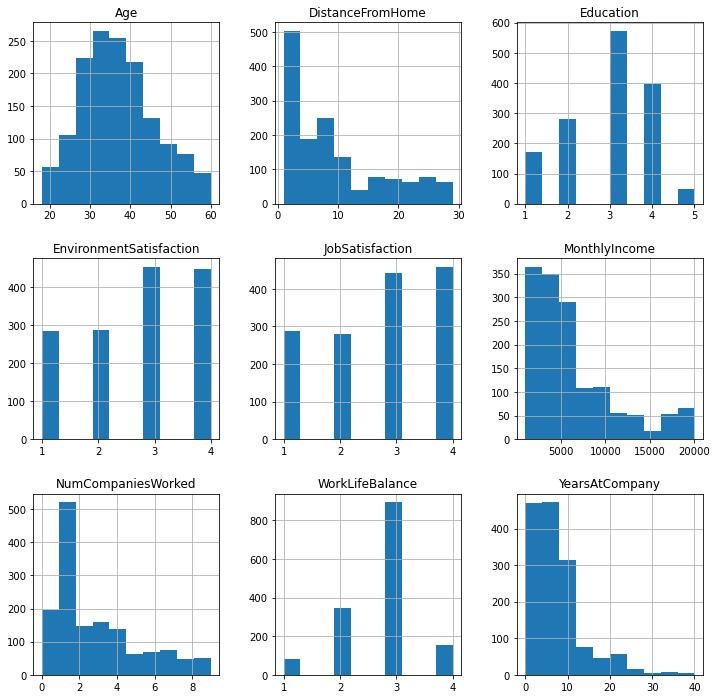

In [4]:
# quick charts to understand data
AttritionData.hist(figsize=(12,12))
plt.show()

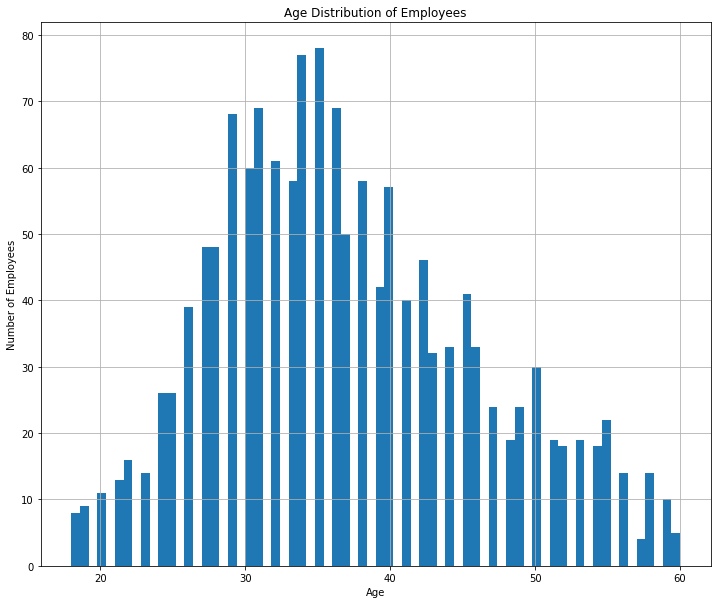

In [5]:
#Check the Age Distribution of Employees
plt.figure(figsize=(12,10))
AttritionData['Age'].hist(bins = 70)
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.title('Age Distribution of Employees') 
plt.show()

In [6]:
AttritionData['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

C:\Users\pydch\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Attrition', ylabel='count'>

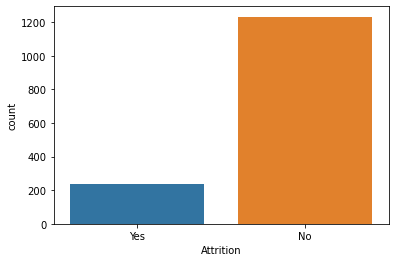

In [7]:
# Attrition by age
sns.countplot(AttritionData['Attrition'])

<AxesSubplot:xlabel='Age', ylabel='count'>

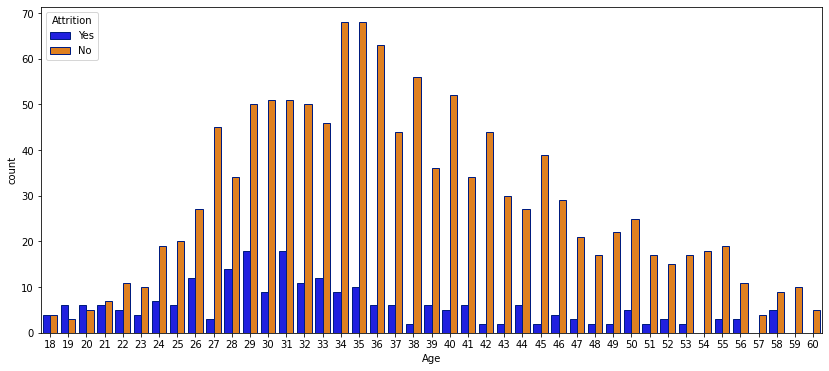

In [8]:
#Employees left and those that stayed by age
figureDimension = (14, 6)
fig, axis = plt.subplots(figsize = figureDimension)

sns.countplot(x = 'Age', hue = 'Attrition', data = AttritionData, palette = ['#0000ff', '#ff8000'], ax = axis, edgecolor = sns.color_palette("dark", n_colors = 1))


In [9]:
#Eduation of the Employees
AttritionData['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

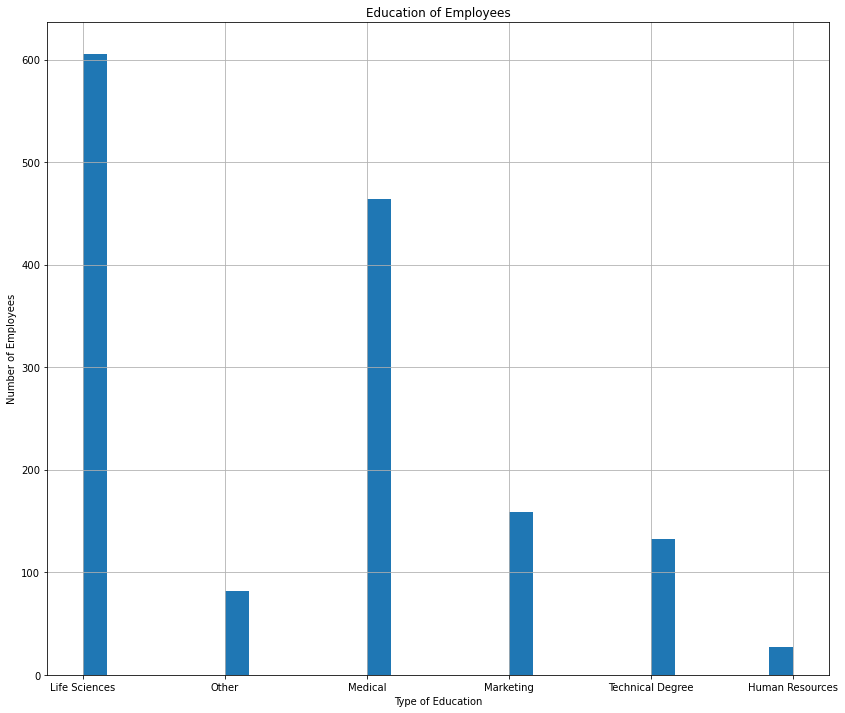

In [10]:
#Graph to show the distribution of Education of Employees
plt.figure(figsize=(14,12))
AttritionData['EducationField'].hist(bins = 30)
plt.xlabel('Type of Education')
plt.ylabel('Number of Employees')
plt.title('Education of Employees') 
plt.show()

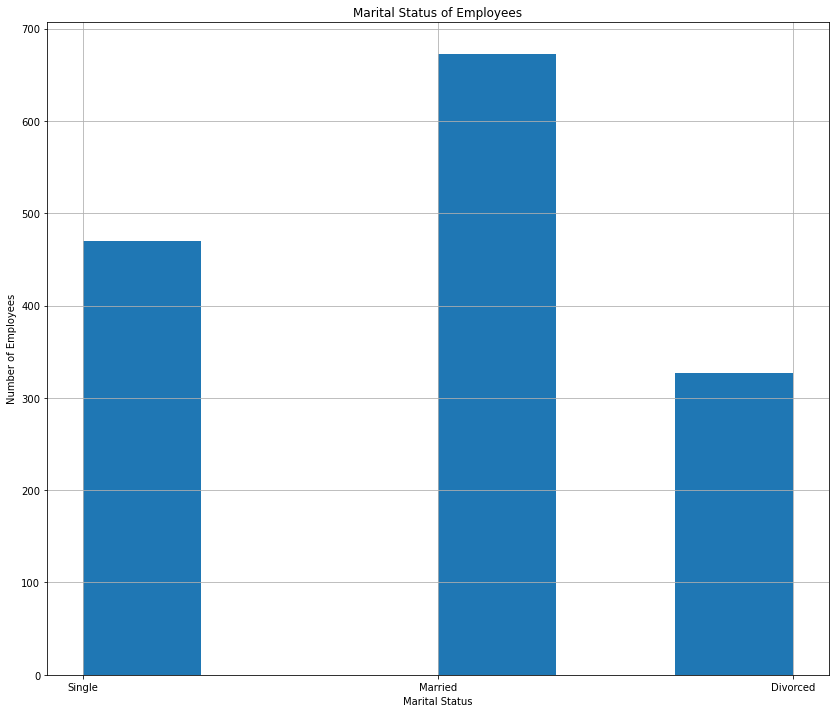

In [11]:
#Married Vs Unmarried
plt.figure(figsize=(14,12))
AttritionData['MaritalStatus'].hist(bins = 6)
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.title('Marital Status of Employees') 
plt.show()

In [12]:
#Logistic Regression
AttritionData.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [13]:
#Standard Deviation

AttritionData.std()

Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [14]:
AttritionData['Attrition'].replace('No', 0, inplace = True)
AttritionData['Attrition'].replace('Yes', 1, inplace=True)

In [15]:
AttritionData.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [16]:
# Logistic Regression
X = AttritionData.drop(['Attrition'], axis = 1)
X.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [17]:
Y = AttritionData['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [18]:
#Renaming Education to Numbers
AttritionData['EducationField'].replace('LifeSciences', 1,inplace = True)
AttritionData['EducationField'].replace('Medical', 2,inplace = True)
AttritionData['EducationField'].replace('Marketing', 3,inplace = True)
AttritionData['EducationField'].replace('Other', 4,inplace = True)
AttritionData['EducationField'].replace('Technical Degree', 5,inplace = True)
AttritionData['EducationField'].replace('Human Resources', 6,inplace = True)

In [19]:
#Checking to see if the renaming worked
AttritionData['EducationField'].value_counts()

Life Sciences    606
2                464
3                159
5                132
4                 82
6                 27
Name: EducationField, dtype: int64

In [20]:
#Renaming Department Names
AttritionData['Department'].replace('Research & Development',1, inplace=True)
AttritionData['Department'].replace('Sales',2, inplace=True)
AttritionData['Department'].replace('Human Resources', 3, inplace=True)
AttritionData['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [21]:
#Renaming Marital Status
AttritionData['Department'].replace('Research & Development',1, inplace=True)
AttritionData['Department'].replace('Sales',2, inplace=True)
AttritionData['Department'].replace('Human Resources', 3, inplace=True)
AttritionData['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [22]:
xVar = AttritionData.select_dtypes(include=['int64'])
xVar.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [23]:
xVar.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [24]:
yVar = AttritionData['Attrition']
yVar.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [25]:
yVar = np.ravel(yVar)

In [26]:
#finally the logistic regression
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg = logReg.fit(xVar, yVar)

C:\Users\pydch\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
#Check the accuracy
logReg.score(xVar, yVar)

0.9659863945578231

In [28]:
xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(xVar,yVar, test_size = 0.3, random_state = 0)
model = LogisticRegression()
model.fit(xTrain, yTrain)

C:\Users\pydch\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [29]:
predictedData = model.predict(xTest)
print(predictedData)

[0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
probability = model.predict_proba(xTest)
print(probability)

[[0.93854495 0.06145505]
 [0.83054747 0.16945253]
 [0.69114818 0.30885182]
 [0.80844247 0.19155753]
 [0.61091353 0.38908647]
 [0.94291448 0.05708552]
 [0.22055668 0.77944332]
 [0.64230469 0.35769531]
 [0.97294876 0.02705124]
 [0.21450004 0.78549996]
 [0.9683951  0.0316049 ]
 [0.48143059 0.51856941]
 [0.97120577 0.02879423]
 [0.1756284  0.8243716 ]
 [0.87234488 0.12765512]
 [0.92298823 0.07701177]
 [0.96594775 0.03405225]
 [0.81078733 0.18921267]
 [0.93664999 0.06335001]
 [0.36658781 0.63341219]
 [0.82898817 0.17101183]
 [0.92443398 0.07556602]
 [0.93484316 0.06515684]
 [0.95208668 0.04791332]
 [0.48222417 0.51777583]
 [0.86177102 0.13822898]
 [0.68532563 0.31467437]
 [0.9614794  0.0385206 ]
 [0.83950637 0.16049363]
 [0.95323822 0.04676178]
 [0.96637685 0.03362315]
 [0.90554508 0.09445492]
 [0.85200924 0.14799076]
 [0.52348416 0.47651584]
 [0.97780081 0.02219919]
 [0.96650586 0.03349414]
 [0.88718827 0.11281173]
 [0.93911048 0.06088952]
 [0.90160745 0.09839255]
 [0.84577146 0.15422854]


In [31]:
from sklearn import metrics
print(metrics.accuracy_score(yTest, predictedData))
print(metrics.roc_auc_score(yTest, probability[:, 1]))
print(metrics.confusion_matrix(yTest, predictedData))
print(metrics.classification_report(yTest, predictedData))

0.8979591836734694
0.9251443973815942
[[363   8]
 [ 37  33]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       371
           1       0.80      0.47      0.59        70

    accuracy                           0.90       441
   macro avg       0.86      0.72      0.77       441
weighted avg       0.89      0.90      0.89       441



In [32]:
print(xTrain)

      Age  Attrition  Department  DistanceFromHome  Education  \
338    30          0           2                 5          3   
363    33          1           2                 5          3   
759    45          0           3                24          4   
793    28          0           1                15          2   
581    30          0           1                 1          3   
...   ...        ...         ...               ...        ...   
763    34          0           2                10          4   
835    35          0           3                 8          4   
1216   43          0           2                 2          3   
559    38          0           1                 2          5   
684    40          0           2                10          4   

      EnvironmentSatisfaction  JobSatisfaction  MonthlyIncome  \
338                         4                3           6118   
363                         4                3           2851   
759                     